In [1]:
#import library
import numpy as np
import pandas as pd
import yfinance as yf #Stock Data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from transformers import pipeline
import finnhub #Company News
import torch

pd.set_option('display.max_colwidth',180)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-11-21 19:21:25.002951: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Companies top 500 

In [2]:
companies = pd.read_csv('/Users/natashaprabhoo/AI-ML-Studio/S&P_500_companies.csv')
company_symbol = 'PPL'

companies.head(15)


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999


## Stock Data

In [3]:
stock_data = yf.download(company_symbol,start='2023-1-1',end=datetime.today())
stock_data = stock_data.reset_index()
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,29.309999,29.420000,28.709999,29.200001,27.399002,5784700
1,2023-01-04,29.350000,30.230000,29.260000,29.930000,28.083979,7792100
2,2023-01-05,29.719999,29.860001,29.200001,29.240000,27.436537,6309900
3,2023-01-06,29.570000,29.990000,29.410000,29.959999,28.112125,5201300
4,2023-01-09,29.910000,30.420000,29.910000,30.170000,28.309175,5623300


## Company News

In [4]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from="2020-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])
news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
news['datetime'] = pd.to_datetime(news['datetime'])


news.head()

,datetime,headline,related,source,summary
0,2023-12-29,PPL Corp. stock outperforms market despite losses on the day,PPL,MarketWatch,"Shares of PPL Corp. slid 0.18% to $27.10 Friday, on what proved to be an all-around poor trading session for the stock market, with the S&P 500 Index falling..."
1,2023-12-28,PPL Corp. stock underperforms Thursday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.41% higher to $27.15 Thursday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
2,2023-12-27,PPL Corp. stock underperforms Wednesday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.22% higher to $27.04 Wednesday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
3,2023-12-26,PPL Corp. stock underperforms Tuesday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.60% higher to $26.98 Tuesday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
4,2023-12-22,PPL Corp. stock outperforms market on strong trading day,PPL,MarketWatch,"Shares of PPL Corp. rallied 1.63% to $26.82 Friday, on what proved to be an all-around mixed trading session for the stock market, with the S&P 500 Index..."


In [5]:
import requests

url = f'https://eodhd.com/api/news?s=AAPL.US&offset=0&limit=10&api_token=demo&fmt=json'
data = requests.get(url).json()

print(data)

[{'date': '2024-11-20T15:51:00+00:00', 'title': 'Qualcomm Plans for Life After Apple. It’s Coming for Intel and AMD.', 'content': 'Qualcomm is aiming for an additional $22 billion in annual revenue from providing chips for PCs, vehicles and the Internet of Things,\n\nContinue reading\n\nView comments', 'link': 'https://finance.yahoo.com/m/64dccacd-9e91-38b2-ad16-abe07d0f96ca/qualcomm-plans-for-life-after.html', 'symbols': ['0R2V.IL', '1INTC.MI', 'AAPL.BA', 'AAPL.MX', 'AAPL.NEO', 'AAPL.SN', 'AAPL.US', 'AAPL34.SA', 'APC.BE', 'APC.DU', 'APC.F', 'APC.HA', 'APC.HM', 'APC.MU', 'APC.STU', 'APC.XETRA', 'APC8.F', 'INL.BE', 'INL.F', 'INL.HM'], 'tags': [], 'sentiment': {'polarity': 0, 'neg': 0, 'neu': 1, 'pos': 0}}, {'date': '2024-11-20T00:00:00+00:00', 'title': "Is Apple's Market Cap Going to $4 Trillion?", 'content': "Is Apple's Market Cap Going to $4 Trillion?", 'link': 'https://www.fool.com/investing/2024/11/20/is-apples-market-cap-going-to-4-trillion/', 'symbols': ['AAPL.US'], 'tags': [], 's

In [6]:
news.head()
news['datetime'].nunique()


21

In [7]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from="2023-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])
news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
news['datetime'] = pd.to_datetime(news['datetime'])

news.head()

,datetime,headline,related,source,summary
0,2023-12-29,PPL Corp. stock outperforms market despite losses on the day,PPL,MarketWatch,"Shares of PPL Corp. slid 0.18% to $27.10 Friday, on what proved to be an all-around poor trading session for the stock market, with the S&P 500 Index falling..."
1,2023-12-28,PPL Corp. stock underperforms Thursday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.41% higher to $27.15 Thursday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
2,2023-12-27,PPL Corp. stock underperforms Wednesday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.22% higher to $27.04 Wednesday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
3,2023-12-26,PPL Corp. stock underperforms Tuesday when compared to competitors despite daily gains,PPL,MarketWatch,"Shares of PPL Corp. inched 0.60% higher to $26.98 Tuesday, on what proved to be an all-around favorable trading session for the stock market, with the S&P..."
4,2023-12-22,PPL Corp. stock outperforms market on strong trading day,PPL,MarketWatch,"Shares of PPL Corp. rallied 1.63% to $26.82 Friday, on what proved to be an all-around mixed trading session for the stock market, with the S&P 500 Index..."


In [8]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
def get_news(stock, start_date='2023-03-07', end_date=datetime.today().date() - timedelta(days=1)):
    today_date = datetime.today().date()
    
    news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from="2023-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])

    news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
    news['datetime'] = pd.to_datetime(news['datetime'])
    news = news.sort_values('datetime', ascending=True)

    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

    # Add sentiment analysis for each headline
    news['truncated_headline'] = news['headline'].apply(lambda x: truncate_sequence(x))
    news['headline_sentiment'] = news['truncated_headline'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
    news['headline_sentiment_score'] = news['truncated_headline'].apply(lambda x: sentiment_pipeline(x)[0]['score'])
    news['sentiment_binary'] = news['headline_sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

    return news[['datetime', 'source', 'headline', 'headline_sentiment', 'headline_sentiment_score', 'sentiment_binary']]

def truncate_sequence(text):
    return text if len(text) <= 512 else text[:512]

 
news_data = get_news(company_symbol)
print(news_data.head())

     datetime                source  \
41 2023-11-28  Energy Stock Channel   
40 2023-11-28                 Yahoo   
39 2023-11-29           MarketWatch   
38 2023-11-30         Seeking Alpha   
37 2023-11-30           MarketWatch   

                                                                  headline  \
41                   PPL Makes Bullish Cross Above Critical Moving Average   
40                 What Is PPL Corporation's (NYSE:PPL) Share Price Doing?   
39    PPL Corp. stock underperforms Wednesday when compared to competitors   
38  Duke Energy upgraded at Wells Fargo as energy transition drives growth   
37              PPL Corp. stock rises Thursday, still underperforms market   

   headline_sentiment  headline_sentiment_score  sentiment_binary  
41           POSITIVE                  0.985667                 1  
40           NEGATIVE                  0.998740                 0  
39           NEGATIVE                  0.997158                 0  
38           POSITIVE   

In [9]:
# Creating a datafram with the overall sentiment score for each day

news_data = get_news(company_symbol)
average_sentiment = news_data.groupby('datetime').agg({
    'sentiment_binary': 'mean'  
}).reset_index()

average_sentiment.rename(columns={'sentiment_binary': 'average_daily_sentiment'}, inplace=True)

average_sentiment['datetime'] = pd.to_datetime(average_sentiment['datetime'])
average_sentiment.set_index('datetime', inplace=True)
average_sentiment.head()

,average_daily_sentiment
datetime,
2023-11-28,0.500000
2023-11-29,0.000000
2023-11-30,0.666667
2023-12-01,0.000000
2023-12-04,0.000000


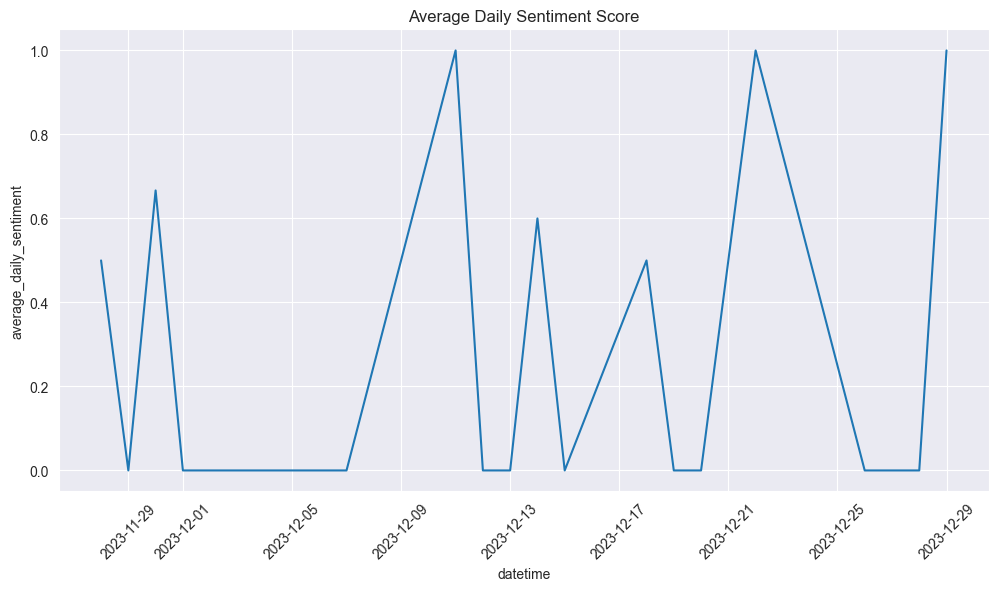

In [10]:
# Plotting the average sentiment score for each day
plt.figure(figsize=(12,6))
sns.lineplot(x='datetime',y='average_daily_sentiment',data=average_sentiment)
plt.title('Average Daily Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Testing stock data

stock = yf.Ticker(company_symbol)
stock_info = stock.info

print("Stock Name:", stock_info['shortName'])
print("Previous Close:", stock_info['regularMarketPreviousClose'])

# Fetching the stock's current price
current_price = stock_info.get('regularMarketPrice', 'Data not available')
if (current_price == 'Data not available'):
    current_price = stock_info.get('regularMarketPreviousClose', 'Data not available')
    print("Current Price:", current_price)

Stock Name: PPL Corporation
Previous Close: 34.27
Current Price: 34.27


In [12]:
# Testing stock data and finding close prices
def get_stock_data(stock_symbol, start_date='2023-03-07', end_date=datetime.today().date() - timedelta(days=1)):
    stock = yf.Ticker(stock_symbol)
    stock_info = stock.history(start=start_date, end=end_date)

    stock_df = pd.DataFrame({
        'datetime': stock_info.index.date,
        'previous_close': stock_info['Close']  
    })

    stock_df['datetime'] = pd.to_datetime(stock_df['datetime'])
    stock_df.set_index('datetime', inplace=True)
    return stock_df


stock_data = get_stock_data(company_symbol)
stock_data.head()

,previous_close
datetime,
2023-03-07,25.222095
2023-03-08,25.334696
2023-03-09,25.164282
2023-03-10,24.851860
2023-03-13,25.334698


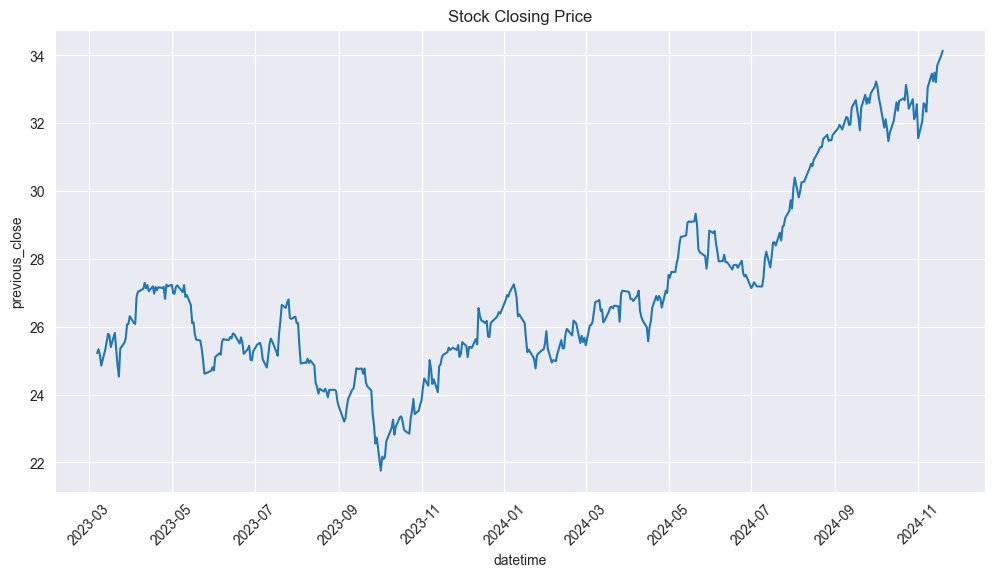

In [13]:
# Plotting the stock's closing price
plt.figure(figsize=(12,6))
sns.lineplot(x=stock_data.index,y='previous_close',data=stock_data)
plt.title('Stock Closing Price')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Find the subset of stock prices that correlate with the sentiment data
stock_data.index = stock_data.index.normalize()  
average_sentiment.index = average_sentiment.index.normalize()  

# Merge the DataFrames only if both DataFrames have matching 'datetime' values
result = pd.merge(stock_data[['previous_close']], average_sentiment[['average_daily_sentiment']], 
                  left_index=True, right_index=True, how='inner')

print("Merged Data:")
print(result.head())


Merged Data:
            previous_close  average_daily_sentiment
datetime                                           
2023-11-28       25.458893                 0.500000
2023-11-29       25.111595                 0.000000
2023-11-30       25.198420                 0.666667
2023-12-01       25.545717                 0.000000
2023-12-04       25.429951                 0.000000


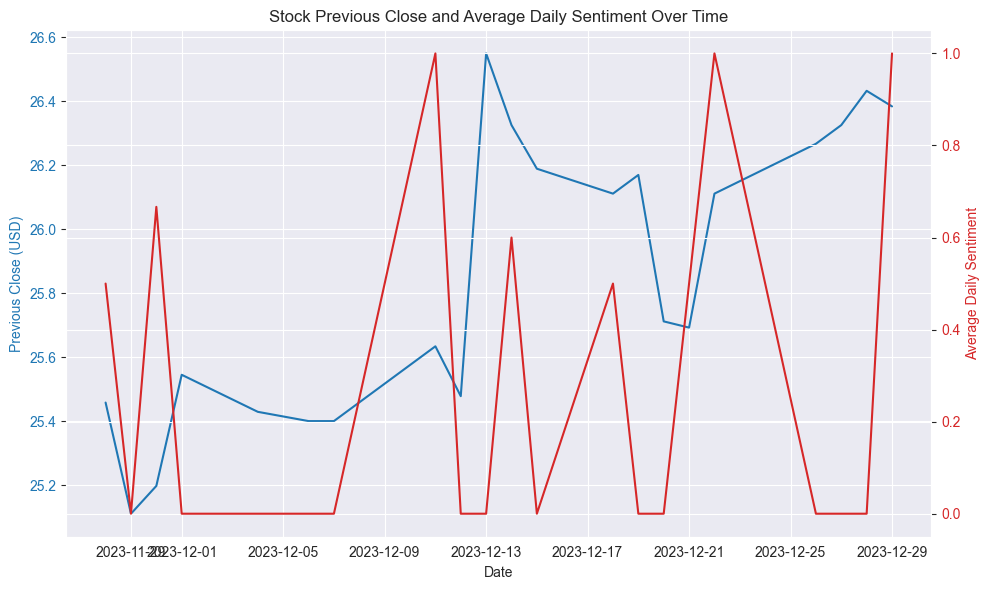

In [15]:
# Create a figure and axis objects to find the correlation between the stock's closing price and the average sentiment score
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Previous Close (USD)', color='tab:blue')
ax1.plot(result.index, result['previous_close'], color='tab:blue', label='Previous Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Daily Sentiment', color='tab:red')
ax2.plot(result.index, result['average_daily_sentiment'], color='tab:red', label='Average Daily Sentiment')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title('Stock Previous Close and Average Daily Sentiment Over Time')
fig.tight_layout()  
plt.show()



In [16]:
# Use an SVM to predict the stock's closing price based on the sentiment data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [17]:
# movement: up is 1, down is 0
result['next_close'] = result['previous_close'].shift(-1)
result['movement'] = (result['next_close'] > result['previous_close']).astype(int)
result.dropna(inplace=True)

# Define the features and target variable
X = result[['average_daily_sentiment', 'previous_close']]
y = result['movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in y_train and y_test
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())






Training set class distribution:
movement
0    9
1    7
Name: count, dtype: int64

Testing set class distribution:
movement
0    2
1    2
Name: count, dtype: int64


In [18]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



In [19]:
new_data = pd.DataFrame({'average_daily_sentiment': [0.3], 'previous_close': [105]})
new_prediction = svm_model.predict(new_data)
print("Predicted Movement:", "Up" if new_prediction[0] == 1 else "Down")

Predicted Movement: Down


In [20]:
# Make a dataframe with the date and the predicted movement
predictions_df = pd.DataFrame({'Date': X_test.index, 'Predicted Movement': y_pred})
predictions_df['Predicted Movement'] = predictions_df['Predicted Movement'].map({1: 'Up', 0: 'Down'})
predictions_df.set_index('Date', inplace=True)
print(predictions_df.head())

           Predicted Movement
Date                         
2023-12-06               Down
2023-12-26               Down
2023-12-18               Down
2023-12-14               Down
